In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.style as style 
# magic word for producing visualizations in notebook
%matplotlib inline
import warnings

In [0]:
# option to filter certain warning info
warnings.filterwarnings('ignore')
# option to set max display rows
pd.options.display.max_rows = 999

In [0]:
# file location and type
file_location = "/FileStore/tables/rearc2ndquestforpythoncode/detailed_listings.csv"
file_type = "csv"

# CV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df_listing = spark.read.format(file_type) \
                  .option("infer_schema", infer_schema) \
                  .option("header", first_row_is_header) \
                  .option("sep", delimiter) \
                  .option("multiline", "true") \
                  .option("quote", "\"") \
                  .option("escape", "\"") \
                  .load(file_location)

display(df_listing.limit(5))

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,"The spaceThis is a small room in a large old apartment which has not been renovated. It is suitable for one person only. It has a twin bed as well as a desk and chair. A window seat extends along one wall. There is a half-bath near the room. The full bath is down a long hallway. Although the room faces the street, there is little traffic because it is one-way and near the park. The entire apartment has wireless internet, including this room. A coin-operated washer and dryer are located in the basement.The location is on a hill which leads to Lafayette ParkIt is centrally located in the Pacific Heights neighborhood, less than half a block from Lafayette Park. It is convenient to the buses which are one to two blocks away. There is a Whole Foods supermarket three blocks away.Many people enjoy walking to the restaurants, cafes and stores on Fillmore St. Union St and Polk St. The architecture is varied and there are landmark bu",null,https://a0.muscache.com/pictures/915742/ada9fb1e_original.jpg,216682,https://www.airbnb.com/users/show/216682,Jay,2010-08-29,"San Francisco, CA","Originally from New York, I work in healthcare and enjoy the great food and diversity of SF.",within a few hours,100%,89%,f,https://a0.muscache.com/im/users/216682/profile_pic/1284924580/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/216682/profile_pic/1284924580/original.jpg?aki_policy=profile_x_medium,Pacific Heights,9,9,"['email', 'phone']",t,t,null,Pacific Heights,null,37.79233,-122.42431,Private room in rental unit,Private room,1,null,null,1,1,"[""Lock on bedroom door"", ""Essentials"", ""Dryer"", ""Hair dryer"", ""Bed linens"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Washer"", ""Fire extinguisher"", ""Wifi"", ""Kitchen"", ""Iron"", ""Carbon monoxide alarm"", ""Hangers"", ""Host greets you"", ""Dishes and silverware"", ""Long term stays allowed"", ""Microwave"", ""Hot water"", ""Coffee maker""]",$55.00,30,365,30,30,365,365,30.0,365.0,null,t,7,24,54,54,2022-12-04,120,0,0,2011-07-10,2020-03-31,4.68,4.78,4.45,4.86,4.81,4.81,4.66,null,f,9,4,5,0,0.86
958,https://www.airbnb.com/rooms/958,20221204162417,2022-12-04,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH","Please check local laws re Covid before you request a reservation.Our bright garden unit overlooks a lovely backyard area with fruit trees and native plants. It is an oasis in a big city. The apartment comfortably fits a couple or small family. It is located on a cul de sac street that ends at lovely Duboce Park.The spaceNewly remodeled, modern, and br

In [0]:
listings_data = df_listing.toPandas()

In [0]:
# file location and type
file_location = "/FileStore/tables/rearc2ndquestforpythoncode/detailed_calendar.csv"
file_type = "csv"

# CV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df_calendar = spark.read.format(file_type) \
                  .option("infer_schema", infer_schema) \
                  .option("header", first_row_is_header) \
                  .option("sep", delimiter) \
                  .option("multiline", "true") \
                  .option("quote", "\"") \
                  .option("escape", "\"") \
                  .load(file_location)

display(df_calendar.limit(5))

listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
958,2022-12-04,f,$180.00,$180.00,2,1125
958,2022-12-05,f,$180.00,$180.00,2,1125
958,2022-12-06,f,$209.00,$209.00,2,1125
958,2022-12-07,f,$207.00,$207.00,2,1125
958,2022-12-08,f,$206.00,$206.00,2,1125


In [0]:
calendar_data = df_calendar.toPandas()

In [0]:
#check calendar data
calendar_data.info()
calendar_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477255 entries, 0 to 2477254
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      object
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  object
 6   maximum_nights  object
dtypes: object(7)
memory usage: 132.3+ MB


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2022-12-04,f,$180.00,$180.00,2,1125
1,958,2022-12-05,f,$180.00,$180.00,2,1125
2,958,2022-12-06,f,$209.00,$209.00,2,1125
3,958,2022-12-07,f,$207.00,$207.00,2,1125
4,958,2022-12-08,f,$206.00,$206.00,2,1125


# Explore calendar data set

Out[496]: Text(0.5, 1.0, 'Listing Availability')

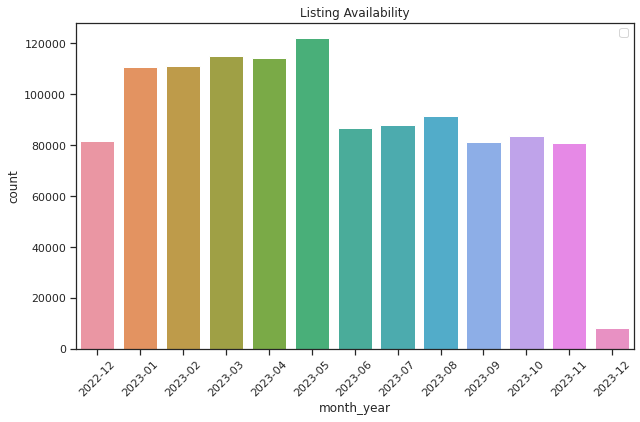

In [0]:
#find list availability in next 12 months
calendar_data_t = calendar_data[calendar_data['available']=='t']
calendar_data_t['date'] = pd.to_datetime(calendar_data_t['date'])
calendar_data_t['month_year'] = calendar_data_t['date'].apply(lambda x:x.strftime('%Y-%m'))
calendar_data_t.sort_values(by='month_year',inplace=True)
g = sns.countplot(x='month_year', data=calendar_data_t)
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=45)
g.legend(loc=1)
g.figure.set_size_inches(10,6)
g.set_title("Listing Availability")

Percentage of listings with price <$500: 91.3%


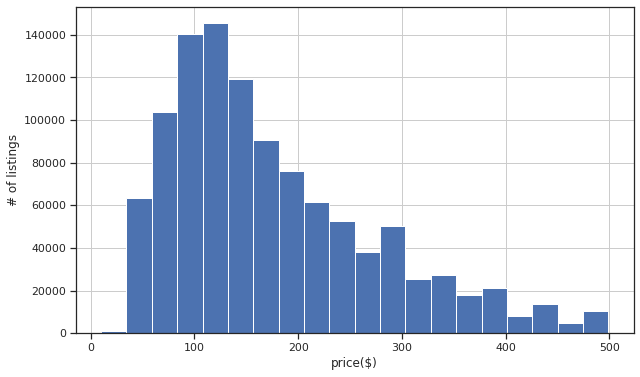

In [0]:
#find price distribution in next 12 months
calendar_data_t[['price']] =calendar_data_t[['price']].replace('[\$,]', '', regex=True).astype(float)
#set price cut-off to exclude outliers (i.e., listigns with extremenely high price)
pirce_limit= 500
calendar_data_t_low = calendar_data_t[calendar_data_t['price']<pirce_limit]
print("Percentage of listings with price <${}: {}%".format\
      (pirce_limit,round(calendar_data_t_low.shape[0]/calendar_data_t.shape[0]*100,1)))
ax=calendar_data_t_low.price.hist(bins=20)
ax.set_xlabel("price($)")
ax.set_ylabel("# of listings")
ax.figure.set_size_inches(10,6)

Percentage of listings with price >=$500: 8.7%


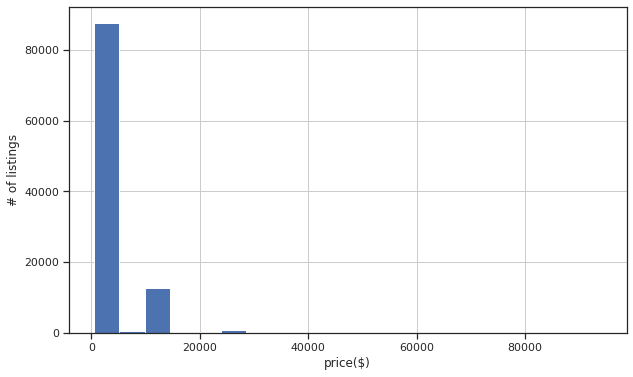

In [0]:
calendar_data_t_high = calendar_data_t[calendar_data_t['price']>=pirce_limit]
print("Percentage of listings with price >=${}: {}%".format\
      (pirce_limit,round(calendar_data_t_high.shape[0]/calendar_data_t.shape[0]*100,1)))
ax=calendar_data_t_high.price.hist(bins=20)
ax.set_xlabel("price($)")
ax.set_ylabel("# of listings")
ax.figure.set_size_inches(10,6)

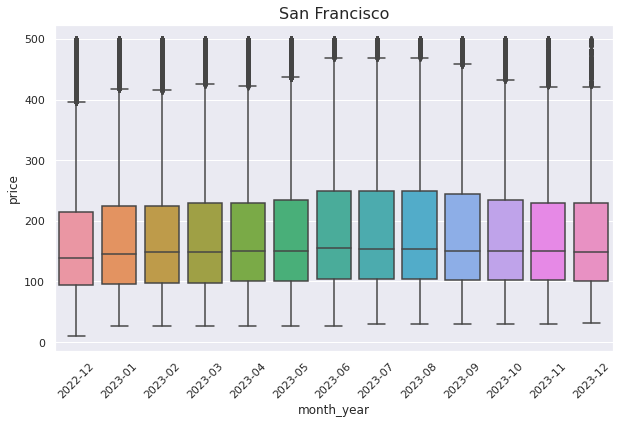

In [0]:
#boxplot of price after exluding outliers
style.use('seaborn-colorblind')
sns.set_style("darkgrid")
g=sns.boxplot(data=calendar_data_t_low, x='month_year',y='price')
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=45)
g.set_title("San Francisco", fontsize=16)
g.figure.set_size_inches(10,6)

In [0]:
style.available

Out[500]: ['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Out[501]: <AxesSubplot:xlabel='neighbourhood_cleansed'>

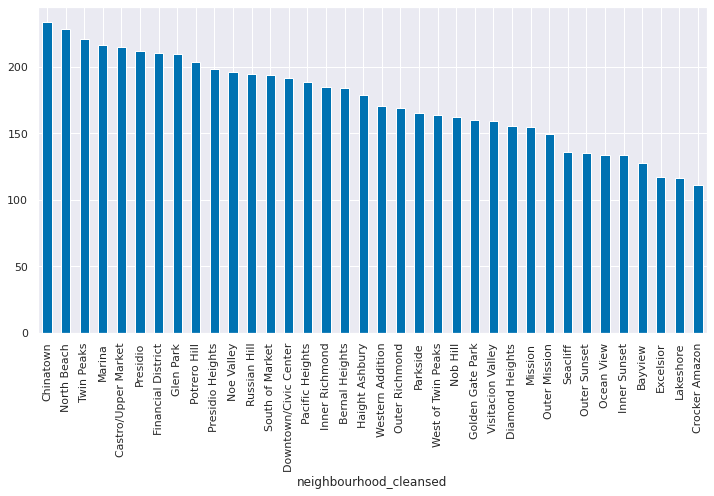

In [0]:
#check price distribution over neighbourhoods\n",
list_neighbourhood=listings_data[['id','neighbourhood_cleansed']]

calendar_neighbourhood_data = pd.merge(calendar_data_t_low, list_neighbourhood, left_on='listing_id', right_on='id')

df_neighbourhood = calendar_neighbourhood_data.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

df_neighbourhood.plot(x=df_neighbourhood.index,y=df_neighbourhood.values, kind="bar", figsize=(12,6))

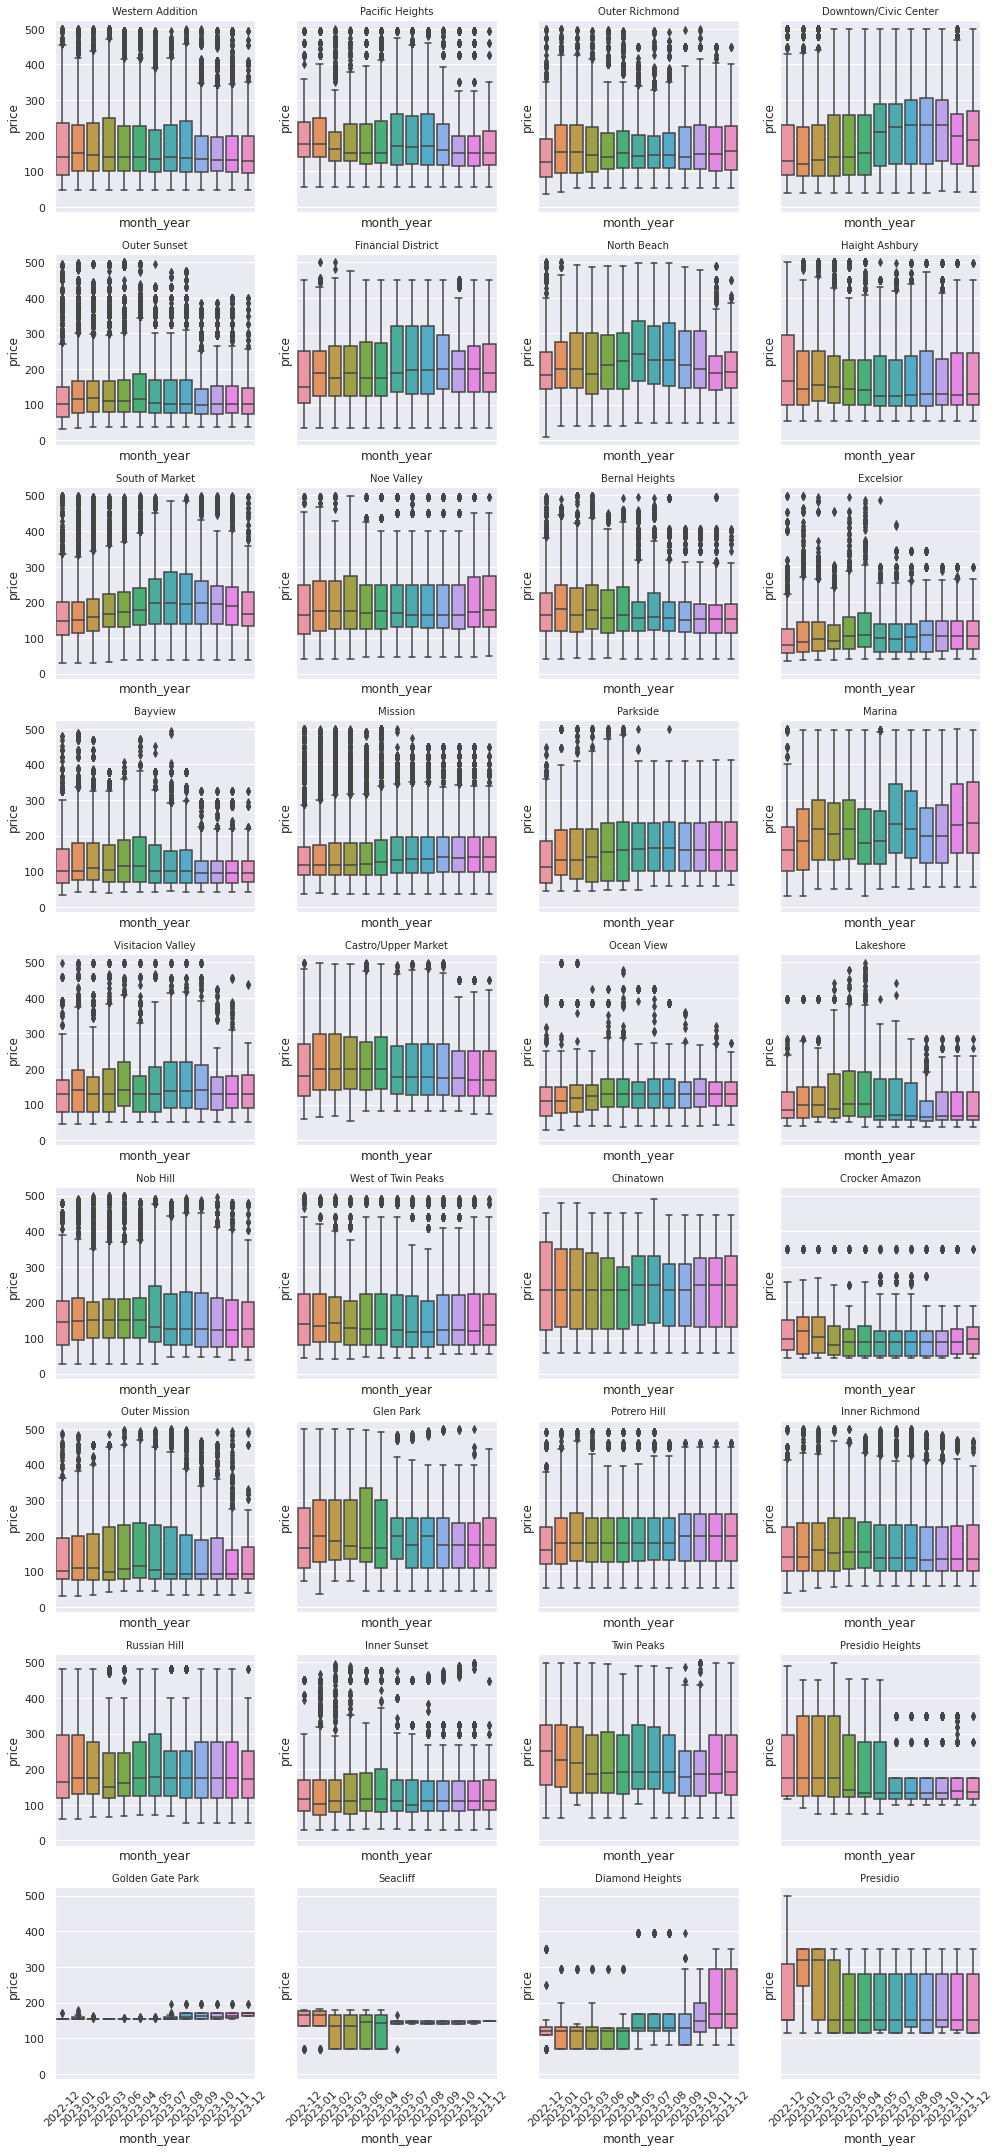

In [0]:
#check price distribution over neighbourhoods over next 12 months
neighbours = calendar_neighbourhood_data['neighbourhood_cleansed'].unique()
#boxplot of price after exluding outliers
style.use('seaborn-colorblind')
sns.set_style("darkgrid")
fig, axes = plt.subplots(9, 4,sharex=True, sharey=True)
fig.set_size_inches(14, 30)

for i, ax in enumerate(axes.flatten()):
        neighbours_subset = calendar_neighbourhood_data[calendar_neighbourhood_data['neighbourhood_cleansed']==neighbours[i]]
        g=sns.boxplot(ax=ax,data=neighbours_subset, x='month_year',y='price')
        ax.set_title(neighbours[i], fontsize=10)
        loc, labels = plt.xticks()
        g.set_xticklabels(labels, rotation=45)
       
plt.tight_layout()

# Explore and clean listings data set

In [0]:
#check listings data
listings_data.info()
listings_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6789 entries, 0 to 6788
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            6789 non-null   object
 1   listing_url                                   6789 non-null   object
 2   scrape_id                                     6789 non-null   object
 3   last_scraped                                  6789 non-null   object
 4   source                                        6789 non-null   object
 5   name                                          6789 non-null   object
 6   description                                   6739 non-null   object
 7   neighborhood_overview                         4741 non-null   object
 8   picture_url                                   6789 non-null   object
 9   host_id                                       6789 non-null   object
 10  

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,144978,https://www.airbnb.com/rooms/144978,20221204162417,2022-12-04,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,None,https://a0.muscache.com/pictures/915742/ada9fb...,216682,...,4.81,4.81,4.66,None,f,9,4,5,0,0.86
1,958,https://www.airbnb.com/rooms/958,20221204162417,2022-12-04,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.28
2,5858,https://www.airbnb.com/rooms/5858,20221204162417,2022-12-04,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,None,f,1,1,0,0,0.67
3,8142,https://www.airbnb.com/rooms/8142,20221204162417,2022-12-04,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,None,f,12,0,12,0,0.09
4,8339,https://www.airbnb.com/rooms/8339,20221204162417,2022-12-04,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,None,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.0,4.94,4.75,STR-0000264,f,2,2,0,0,0.17


Select initial relevant features and recode categorical features

In [0]:
# listings_data.columns

In [0]:
ld = listings_data.loc[:,['name', 'description',\
    'host_since','host_response_time', 'host_response_rate', 'host_is_superhost',\
    'calculated_host_listings_count','host_has_profile_pic','host_identity_verified',\
    'neighbourhood_cleansed','property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',\
    'amenities', 'price', 'minimum_nights',\
    'maximum_nights', 'instant_bookable',\
    'has_availability','availability_30','availability_60','availability_90','availability_365',\
    'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',\
    'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value',\
    'number_of_reviews','reviews_per_month']]

In [0]:
#Get lengths of description elements in order to measure description details of listings
ld.loc[:,'name_length'] = ld['name'].str.len()
ld.loc[:,'description_length'] = ld['description'].str.len()
ld.loc[:,'amenities_length'] = ld['amenities'].str.len()
ld.loc[:,'name_length'].fillna(0, inplace=True)
ld.loc[:,'description_length'].fillna(0, inplace=True)
ld.loc[:,'amenities_length'] = ld['amenities'].str.len()

#Drop original description variables
#Keep 'amenities' as needed later for amenities analysis
ld = ld.drop(['name', 'description'], axis=1)

In [0]:
ld['host_response_time'].value_counts()

Out[507]: within an hour        4034
within a few hours    1136
N/A                   1044
within a day           514
a few days or more      61
Name: host_response_time, dtype: int64

In [0]:
#Recode host_response_time to ordinal values
ld['host_response_time'].replace('within an hour', 1, inplace=True)
ld['host_response_time'].replace('within a few hours', 2, inplace=True)
ld['host_response_time'].replace('within a day', 3, inplace=True)
ld['host_response_time'].replace('a few days or more', 4, inplace=True)
#Impute missing values using forward-fill method
ld['host_response_time'].fillna(method='ffill', inplace=True)

In [0]:
listing_droppedhostrrwithoutna = ld[ld['host_response_rate']!='N/A']

In [0]:
listing_droppedhostrrwithoutna.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,calculated_host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,reviews_per_month,name_length,description_length,amenities_length
0,2010-08-29,2,100%,f,9,t,t,Pacific Heights,Private room in rental unit,Private room,...,4.45,4.86,4.81,4.81,4.66,120,0.86,33,1000.0,327
1,2008-07-31,1,100%,t,1,t,t,Western Addition,Entire serviced apartment,Entire home/apt,...,4.92,4.95,4.88,4.98,4.76,371,2.28,37,1000.0,1147
2,2009-03-02,2,80%,f,1,t,t,Bernal Heights,Entire rental unit,Entire home/apt,...,4.87,4.89,4.85,4.77,4.68,111,0.67,18,1000.0,232
3,2009-06-17,2,100%,f,12,t,t,Haight Ashbury,Private room in rental unit,Private room,...,4.44,4.78,4.78,4.67,4.67,9,0.09,50,1000.0,428
4,2009-07-02,2,100%,f,2,t,t,Western Addition,Entire condo,Entire home/apt,...,5.0,4.94,5.0,4.94,4.75,28,0.17,31,1000.0,567


In [0]:
ld.host_response_rate = listing_droppedhostrrwithoutna.host_response_rate.str[:-1].astype('float64')
print("mean response rate is:", round(ld.host_response_rate.mean(), 2))
print("median response rate is:", round(ld.host_response_rate.median(), 2))
print("the proportion of those who respond 100% of the time is: ", round((ld.host_response_rate == 100).sum()/ld.host_response_rate.count(),2))

mean response rate is: 96.84
median response rate is: 100.0
the proportion of those who respond 100% of the time is:  0.78


In [0]:
#Convert response percentages to numbers
ld['host_response_rate'] = ld['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00
#Impute missing values using forward-fill method
ld['host_response_rate'].fillna(method='ffill', inplace=True)

In [0]:
len(ld[ld['host_response_rate']=='N/A'])

Out[513]: 0

In [0]:
ld['host_response_rate'].value_counts()

Out[514]: 1.00    5311
0.90     362
0.99     262
0.98     111
0.80      82
0.96      77
0.92      66
0.97      60
0.94      52
0.00      50
0.67      50
0.50      33
0.75      29
0.82      27
0.89      27
0.83      27
0.88      18
0.95      17
0.78      17
0.60      17
0.93      16
0.71      13
0.86      10
0.76      10
0.77       7
0.33       7
0.91       6
0.68       3
0.43       3
0.73       3
0.66       3
0.25       2
0.18       2
0.70       2
0.57       2
0.17       1
0.85       1
0.44       1
0.40       1
0.56       1
Name: host_response_rate, dtype: int64

In [0]:
#Change f/t values to binary 0/1
ld['host_is_superhost'].replace('t',1, inplace=True)
ld['host_is_superhost'].replace('f',0, inplace=True)
ld['instant_bookable'].replace('t',1, inplace=True)
ld['instant_bookable'].replace('f',0, inplace=True)
ld['host_has_profile_pic'].replace('t',1, inplace=True)
ld['host_has_profile_pic'].replace('f',0, inplace=True)
ld['host_identity_verified'].replace('t',1, inplace=True)
ld['host_identity_verified'].replace('f',0, inplace=True)
ld['has_availability'].replace('t',1, inplace=True)
ld['has_availability'].replace('f',0, inplace=True)

In [0]:
ld['data_date']= datetime.strptime('2022-12-04', '%Y-%m-%d')
ld['host_since'] = pd.to_datetime(ld['host_since'])
ld['host_months'] = round((ld['data_date']-ld['host_since']).dt.days/30,0)
#Drop original host_since and data_date variables
ld = ld.drop(['data_date', 'host_since'], axis=1)

In [0]:
ld.shape

Out[517]: (6789, 36)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.style as style 

def recode_property(value):
    """
    Encode property category to "Other" if not one of 8 major property categories
    INPUT:
    value - property category (string)
    OUTPUT:
    "Other" - if if not one of 8 major property categories
    value - if major property category
    """
    if value not in ['Entire rental unit','Private room in home']:
        return 'Other'
    return value

def get_cleaned_features(response,df):
    """
    (1) Select features based on the input response feature
    (2) Encode categorical features in to numeric values
    (3) Standardize numeric features
    INPUT:
    ld - data frame of listings data
    response - feature selected as response variable
               including ('reviews_per_month', 'review_scores_rating',
                        'number_of_reviews','price')
    OUTPUT:
    ld_cleaned - data frame with cleaned features
    """
    predictors = df.drop(response, axis=1)

    list_feat_cat_binary = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', \
                            'instant_bookable', 'has_availability']
    list_feat_cat_multiple = ['neighbourhood_cleansed', 'property_type', 'room_type']
    list_feat_numeric = ['host_response_rate', 'calculated_host_listings_count', 'accommodates', \
                         'bathrooms', 'bedrooms', 'beds', \
                         'minimum_nights', 'maximum_nights', 'number_of_reviews', \
                         'name_length', 'description_length', 'amenities_length',
                         'host_months', \
                         'availability_30', 'availability_60', 'availability_90', 'availability_365', \
                         'reviews_per_month', 'price', 'review_scores_rating']
    # Remove feature if it is the response variable
    if response == 'reviews_per_month':
        list_feat_numeric.remove('reviews_per_month')
    elif response == 'review_scores_rating':
        list_feat_numeric.remove('review_scores_rating')
    elif response == 'number_of_reviews':
        list_feat_numeric.remove('number_of_reviews')
    elif response == 'price':
        list_feat_numeric.remove('price')

    list_feat_ordinal = ['host_response_time']

    # list_feat_cat_many = ['amenities']

    # ld_cat_many = predictors[list_feat_cat_many]
    # ld_cat_many.head()

    predictors[list_feat_cat_multiple] = predictors[list_feat_cat_multiple].astype(str)
    ld_cat_multiple = predictors[list_feat_cat_multiple]
    ld_cat_dummy = pd.get_dummies(ld_cat_multiple)
    # ld_cat_dummy.head()

    ld_cat_binary = predictors[list_feat_cat_binary]
    # ld_cat_binary.head()

    ld_ord = predictors[list_feat_ordinal]
    # ld_ord.head()

    ld_numeric = predictors[list_feat_numeric]
    # ld_numeric.describe()

    ld_cleaned = pd.concat([ld_cat_dummy, ld_cat_binary, ld_ord, ld_numeric], axis=1)
    # ld_cleaned.shape

    # Initialize a scaler, then apply it to the numeric features
    scaler = MinMaxScaler()  # default=(0, 1)
    ld_numeric = pd.DataFrame(data=ld_cleaned[list_feat_numeric])
    ld_numeric_scaled = scaler.fit_transform(ld_numeric)
    ld_cleaned[list_feat_numeric] = ld_numeric_scaled

    return ld_cleaned

def get_feature_importance(response, ld, top_n):
    """
    Determine the feature importance using RandomForestRegressor
    INPUT:
    response - feature selected as response variable
    ld - cleaned data frame
    top_n - number of top features to display
    OUTPUT:
    df - data frame with features ordered by feature importance score
    """
    # Split the 'features' and 'income' data into training and testing sets
    #replace all NaN values with zeros
    ld['host_response_time'] = ld['host_response_time'].replace('N/A', 0)

    #convert 'host_response_time' column from float to integer
    ld['host_response_time'] = ld['host_response_time'].astype(int)
    y = ld[response]
    x = ld.drop(response, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))

    # Apply RandomForestRegressor to train and find optimal parameters
    param_grid = {"n_estimators": [10, 100, 200], \
                  "max_depth": [5, 10, 20], \
                  "max_features": [1, 5, 10],
                  "min_samples_split": [10, 20, 40], \
                  "min_samples_leaf": [1, 5, 10], \
                  "bootstrap": [True, False]}
    model = RandomForestRegressor(random_state=321)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.best_params_)

    # Predict using optimal parameters
    rfc_best = RandomForestRegressor(random_state=321, n_estimators=grid.best_params_['n_estimators'],
                                     max_depth=grid.best_params_['max_depth'],
                                     max_features=grid.best_params_['max_features'],
                                     min_samples_leaf=grid.best_params_['min_samples_leaf'],
                                     min_samples_split=grid.best_params_['min_samples_split'],
                                     bootstrap=grid.best_params_['bootstrap'])
    rfc_best.fit(X_train, y_train)
    # print(rfc_best.score(X_test,y_test))
    df = pd.DataFrame(list(zip(x.columns, rfc_best.feature_importances_)), columns=['feature', 'importance score']) \
        .sort_values(by='importance score', ascending=False)
    # df.head(10)

    # find out feature importance relative to target variable
    # importances = rfc_best.feature_importances_
    # indices = np.argsort(importances)
    # features = x.columns
    plt.figure(1)
    plt.figure(figsize=(6, 4))
    plt.title('Feature Importances to: ' + response)
    # plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.barh(range(0, top_n), df['importance score'][0:top_n], color='b', align='center')
    # plt.yticks(range(len(indices)), features[indices])
    plt.yticks(range(0, top_n), df['feature'][0:top_n])
    # print(indices)
    plt.xlabel('Importance Score')
    plt.gca().invert_yaxis()
    return df

def comparison_amenities(target, ld_amenities):
    """
    Compare top amenites impact on review_per_month and review_scores_rating
    INPUT:
    target - target feature (review_per_month or review_scores_rating)
    ld - data frame of amenities
 
    OUTPUT:
    Comparsion chart of amenities impact on a listing's target feature
    """
    
    heating_target_df = ld_amenities.groupby('heating_available')[target].mean()
    wifi_target_df = ld_amenities.groupby('wifi_available')[target].mean()
    essentials_target_df = ld_amenities.groupby('essentials_available')[target].mean()
    df_target = pd.concat([heating_target_df,wifi_target_df,essentials_target_df], axis=1)
    df_target.reset_index(inplace = True)
    df_target.columns = ['availability','heating','wifi','essentials']
    df_target['availability']=['Not_Available','Available']
    df_target.set_index('availability',inplace = True)
    print(df_target)
    my_colors = 'rbygck'  #red, green, blue, black, etc.
    g=df_target.transpose().plot(y=['Available','Not_Available'], kind="bar", color=my_colors, figsize=(8,6))
   
    g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    g.set_title(target)

In [0]:
#We will replace some property names, we will keep the most dominant ones however
ld.property_type.replace({'Entire condo': 'Entire rental unit',
                                       'Entire home': 'Entire rental unit',
                                       'Entire guest suite': 'Entire rental unit',
                                       'Private room in rental unit': 'Private room in home',
                                       'Private room in condo': 'Private room in home',
                                       'Room in boutique hotel': 'Other',
                                       'Room in hotel': 'Other',
                                       'Entire serviced apartment': 'Other',
                                       'Room in aparthotel': 'Other',
                                       'Entire townhouse': 'Other',
                                       'Private room in guest suite': 'Private room in home',
                                       'Entire loft': 'Entire rental unit'},
                                       inplace=True)

In [0]:
ld.property_type.replace({'Private room in townhouse': 'Private room in home',
                                       'Private room in resort': 'Private room in home',
                                       'Entire guesthouse': 'Entire rental unit',
                                       'Private room in bed and breakfast': 'Private room in home',
                                       'Entire cottage': 'Entire rental unit'}, inplace=True)

In [0]:
#Encode property_type category to 9 categories
ld['property_type'] = ld['property_type'].apply(recode_property)

In [0]:
ld.property_type.value_counts()

Out[522]: Entire rental unit      4039
Private room in home    1662
Other                   1088
Name: property_type, dtype: int64

In [0]:
ld_price = pd.DataFrame()

In [0]:
del ld_price

In [0]:
ld.price = ld.price.str[1:-3]
ld.price = ld.price.str.replace(",","")
ld.price = ld.price.str.replace(".","")
ld.price = ld.price.astype('float64')

In [0]:
ld['host_is_superhost'].fillna(0, inplace=True)
#Assuming zero values for missing bed/bedroom/bathroom data
ld['bathrooms'].fillna(0, inplace=True)
ld['bedrooms'].fillna(0, inplace=True)
ld['beds'].fillna(0, inplace=True)
#check NaN count each column
ld.isnull().sum()

Out[526]: host_response_time                   0
host_response_rate                   0
host_is_superhost                    0
calculated_host_listings_count       0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
instant_bookable                     0
has_availability                     0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
review_scores_rating              1227
review_scores_accuracy            1247
review_scores_c

In [0]:
#Features with missing values are all review related
#review related features tend to miss all the values altogether in a row
df_rpm_nan = ld[ld['reviews_per_month'].isnull()]
df_rpm_nan[['reviews_per_month','number_of_reviews','review_scores_rating', 'review_scores_accuracy',\
            'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',\
            'review_scores_location','review_scores_value']].head()

,reviews_per_month,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
146,None,0,None,None,None,None,None,None,None
163,None,0,None,None,None,None,None,None,None
267,None,0,None,None,None,None,None,None,None
273,None,0,None,None,None,None,None,None,None
311,None,0,None,None,None,None,None,None,None


In [0]:
# Drop rows with missing review date
ld.dropna(inplace=True)

In [0]:
# Check correlation between various review scores. Will use 'review_scores_rating' as
# the overall review score for the list. Drop other review scores.
review = ld[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',\
           'review_scores_checkin', 'review_scores_communication','review_scores_location',\
            'review_scores_value']]
review.describe()

review = review.astype(float)
review.dtypes

Out[529]: review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [0]:
review.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.68,4.78,4.45,4.86,4.81,4.81,4.66
1,4.86,4.93,4.92,4.95,4.88,4.98,4.76
2,4.88,4.85,4.87,4.89,4.85,4.77,4.68
3,4.67,4.44,4.44,4.78,4.78,4.67,4.67
4,4.87,4.88,5.00,4.94,5.00,4.94,4.75


In [0]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 6788
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         5541 non-null   float64
 1   review_scores_accuracy       5541 non-null   float64
 2   review_scores_cleanliness    5541 non-null   float64
 3   review_scores_checkin        5541 non-null   float64
 4   review_scores_communication  5541 non-null   float64
 5   review_scores_location       5541 non-null   float64
 6   review_scores_value          5541 non-null   float64
dtypes: float64(7)
memory usage: 346.3 KB


In [0]:
review.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.824512,0.739517,0.639141,0.749080,0.516900,0.798846
review_scores_accuracy,0.824512,1.000000,0.678426,0.629407,0.692579,0.426007,0.720505
review_scores_cleanliness,0.739517,0.678426,1.000000,0.502820,0.548785,0.359854,0.624813
review_scores_checkin,0.639141,0.629407,0.502820,1.000000,0.672770,0.424936,0.572987
review_scores_communication,0.749080,0.692579,0.548785,0.672770,1.000000,0.419787,0.673421
review_scores_location,0.516900,0.426007,0.359854,0.424936,0.419787,1.000000,0.538340
review_scores_value,0.798846,0.720505,0.624813,0.572987,0.673421,0.538340,1.000000


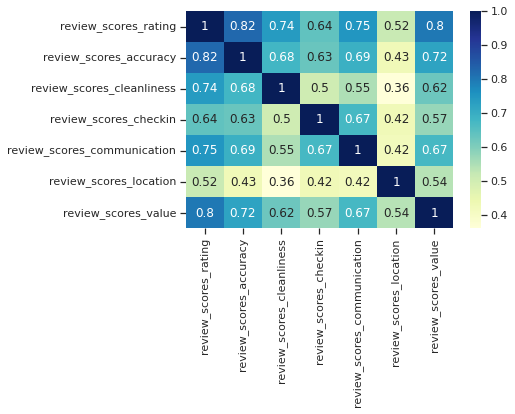

In [0]:
sns.set(style="ticks")
sns.heatmap(review.corr(), annot=True, cmap="YlGnBu");

# Clean data and determine feature importance

In [0]:
ld.reviews_per_month = ld.reviews_per_month.astype('float64')

In [0]:
# set number of top features to list
top_n =3
#Determine feature importance for 'reviews_per_month'
response = 'reviews_per_month'
ld_cleaned = get_cleaned_features(response,ld)

In [0]:
ld_X_y =pd.concat([ld[response],ld_cleaned], axis=1)

In [0]:
ld_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 6788
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   neighbourhood_cleansed_Bayview                5541 non-null   uint8  
 1   neighbourhood_cleansed_Bernal Heights         5541 non-null   uint8  
 2   neighbourhood_cleansed_Castro/Upper Market    5541 non-null   uint8  
 3   neighbourhood_cleansed_Chinatown              5541 non-null   uint8  
 4   neighbourhood_cleansed_Crocker Amazon         5541 non-null   uint8  
 5   neighbourhood_cleansed_Diamond Heights        5541 non-null   uint8  
 6   neighbourhood_cleansed_Downtown/Civic Center  5541 non-null   uint8  
 7   neighbourhood_cleansed_Excelsior              5541 non-null   uint8  
 8   neighbourhood_cleansed_Financial District     5541 non-null   uint8  
 9   neighbourhood_cleansed_Glen Park              5541 non-null   u

In [0]:
ld_cleaned.head(5)

,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,...,name_length,description_length,amenities_length,host_months,availability_30,availability_60,availability_90,availability_365,price,review_scores_rating
0,0,0,0,0,0,0,0,0,0,0,...,0.241379,1.0,0.148002,0.850575,0.233333,0.400000,0.600000,0.147945,0.00220,0.9200
1,0,0,0,0,0,0,0,0,0,0,...,0.275862,1.0,0.552541,1.000000,0.033333,0.250000,0.388889,0.441096,0.00776,0.9650
2,0,1,0,0,0,0,0,0,0,0,...,0.112069,1.0,0.101135,0.959770,1.000000,1.000000,1.000000,1.000000,0.00940,0.9700
3,0,0,0,0,0,0,0,0,0,0,...,0.387931,1.0,0.197829,0.936782,1.000000,1.000000,1.000000,1.000000,0.00224,0.9175
4,0,0,0,0,0,0,0,0,0,0,...,0.224138,1.0,0.266404,0.931034,0.966667,0.983333,0.988889,0.997260,0.02300,0.9675


In [0]:
ld_X_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 6788
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   reviews_per_month                             5541 non-null   float64
 1   neighbourhood_cleansed_Bayview                5541 non-null   uint8  
 2   neighbourhood_cleansed_Bernal Heights         5541 non-null   uint8  
 3   neighbourhood_cleansed_Castro/Upper Market    5541 non-null   uint8  
 4   neighbourhood_cleansed_Chinatown              5541 non-null   uint8  
 5   neighbourhood_cleansed_Crocker Amazon         5541 non-null   uint8  
 6   neighbourhood_cleansed_Diamond Heights        5541 non-null   uint8  
 7   neighbourhood_cleansed_Downtown/Civic Center  5541 non-null   uint8  
 8   neighbourhood_cleansed_Excelsior              5541 non-null   uint8  
 9   neighbourhood_cleansed_Financial District     5541 non-null   u

In [0]:
ld_X_y.head(5)

,reviews_per_month,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,...,name_length,description_length,amenities_length,host_months,availability_30,availability_60,availability_90,availability_365,price,review_scores_rating
0,0.86,0,0,0,0,0,0,0,0,0,...,0.241379,1.0,0.148002,0.850575,0.233333,0.400000,0.600000,0.147945,0.00220,0.9200
1,2.28,0,0,0,0,0,0,0,0,0,...,0.275862,1.0,0.552541,1.000000,0.033333,0.250000,0.388889,0.441096,0.00776,0.9650
2,0.67,0,1,0,0,0,0,0,0,0,...,0.112069,1.0,0.101135,0.959770,1.000000,1.000000,1.000000,1.000000,0.00940,0.9700
3,0.09,0,0,0,0,0,0,0,0,0,...,0.387931,1.0,0.197829,0.936782,1.000000,1.000000,1.000000,1.000000,0.00224,0.9175
4,0.17,0,0,0,0,0,0,0,0,0,...,0.224138,1.0,0.266404,0.931034,0.966667,0.983333,0.988889,0.997260,0.02300,0.9675


In [0]:
ld_X_y1 = ld_X_y[ld_X_y.isna().any(axis=1)]

In [0]:
ld_X_y1.head()

,reviews_per_month,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,...,name_length,description_length,amenities_length,host_months,availability_30,availability_60,availability_90,availability_365,price,review_scores_rating


In [0]:
# ld_X_y.host_response_time.unique()

In [0]:
# ld_X_y['host_response_time'] = pd.to_numeric(ld_X_y['host_response_time'], errors='ignore')

In [0]:
# ld_X_y.info()

In [0]:
ld_X_y['host_response_time'].head(10)

Out[546]: 0      2
1      1
2      2
3      2
4      2
5      1
6      1
7    N/A
8      1
9      2
Name: host_response_time, dtype: object

In [0]:
# ld_X_y['host_response_time'].dtype

In [0]:
# #replace all NaN values with zeros
# ld_X_y['host_response_time'] = ld_X_y['host_response_time'].replace('N/A', 0)

# #convert 'host_response_time' column from float to integer
# ld_X_y['host_response_time'] = ld_X_y['host_response_time'].astype(int)

In [0]:
# ld_X_y['host_response_time'].dtype

Training set has 3878 samples.
Testing set has 1663 samples.
0.6986417125070399
{'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


,feature,importance score
57,number_of_reviews,0.269713
55,minimum_nights,0.139598
61,host_months,0.068557
56,maximum_nights,0.057883
50,calculated_host_listings_count,0.048064
60,amenities_length,0.041886
67,review_scores_rating,0.039764
66,price,0.035506
62,availability_30,0.034113
65,availability_365,0.033902


<Figure size 432x288 with 0 Axes>

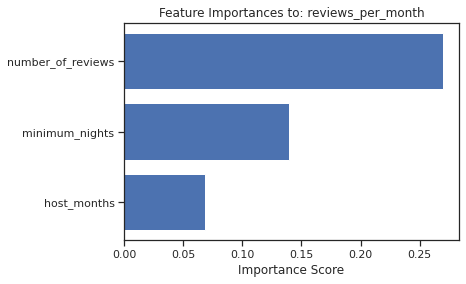

In [0]:
get_feature_importance(response,ld_X_y,top_n)

Training set has 3878 samples.
Testing set has 1663 samples.
0.6986417125070399
{'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


,feature,importance score
57,number_of_reviews,0.269713
55,minimum_nights,0.139598
61,host_months,0.068557
56,maximum_nights,0.057883
50,calculated_host_listings_count,0.048064


<Figure size 432x288 with 0 Axes>

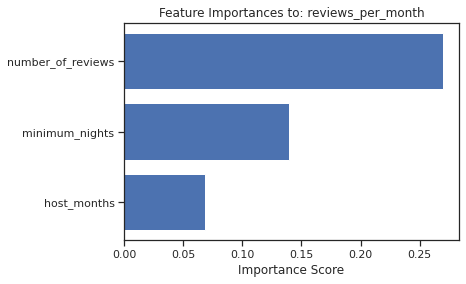

In [0]:
df_importance = get_feature_importance(response,ld_X_y,top_n)
df_importance.head()

Training set has 3878 samples.
Testing set has 1663 samples.
0.20753445701082782
{'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}


,feature,importance score
50,calculated_host_listings_count,0.137391
43,host_is_superhost,0.105974
60,amenities_length,0.081962
66,reviews_per_month,0.067055
67,price,0.063993


<Figure size 432x288 with 0 Axes>

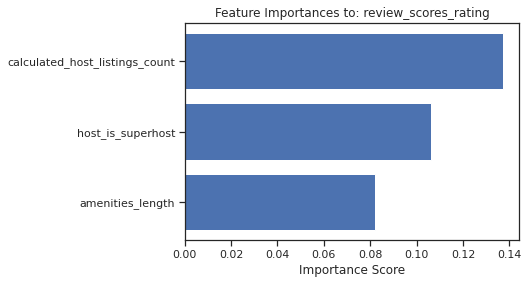

In [0]:
# Determine feature importance for 'review_scores_rating'
response = 'review_scores_rating'
ld_cleaned = get_cleaned_features(response,ld)
ld_X_y =pd.concat([ld[response],ld_cleaned], axis=1)
df_importance = get_feature_importance(response,ld_X_y,top_n)
df_importance.head()

Training set has 3878 samples.
Testing set has 1663 samples.
0.6835084979319103
{'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


,feature,importance score
65,reviews_per_month,0.340819
67,review_scores_rating,0.107281
60,host_months,0.077806
55,minimum_nights,0.058216
66,price,0.040814


<Figure size 432x288 with 0 Axes>

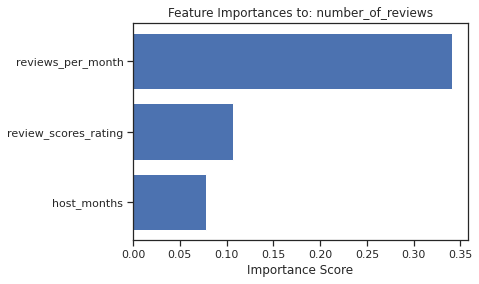

In [0]:
# Determine feature importance for 'reviews_per_month'
response = 'number_of_reviews'
ld_cleaned = get_cleaned_features(response,ld)
 
ld_X_y =pd.concat([ld[response],ld_cleaned], axis=1)
df_importance = get_feature_importance(response,ld_X_y,top_n)
df_importance.head()

Training set has 3878 samples.
Testing set has 1663 samples.
0.2978286474223487
{'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


,feature,importance score
8,neighbourhood_cleansed_Financial District,0.169884
66,reviews_per_month,0.106928
61,host_months,0.069098
48,host_response_time,0.052112
65,availability_365,0.048232
55,minimum_nights,0.044130
60,amenities_length,0.043222
31,neighbourhood_cleansed_South of Market,0.040775
57,number_of_reviews,0.037048
50,calculated_host_listings_count,0.035087


<Figure size 432x288 with 0 Axes>

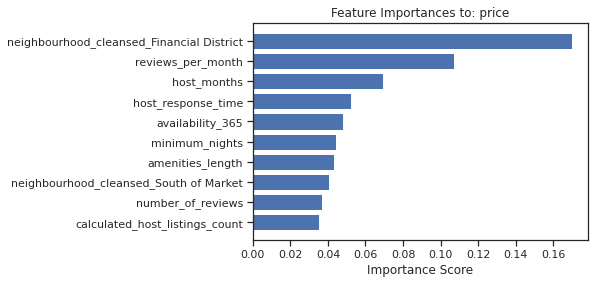

In [0]:
# Determine feature importance for 'price'
response = 'price'
ld_cleaned = get_cleaned_features(response,ld)
 
ld_X_y =pd.concat([ld[response],ld_cleaned], axis=1)
df_importance = get_feature_importance(response,ld_X_y,top_n=10)
df_importance.head(10)

# Determine amenities importance relative to target variable

In [0]:
#creating a dictionary of each amenities and the count value
list_amens = ld['amenities'].tolist()
list_amen_temp_a = []
for m in list_amens:
    list_amen_temp_a.append(m.split(','))

list_amen_temp_b = []
for m in list_amen_temp_a:
    for n in m:
        n=n.replace('"', '')
        n=n.replace('}', '')
        n=n.replace('{', '')
        n=n.replace(' ', '')
        list_amen_temp_b.append(n)

count = Counter(list_amen_temp_b)
count = dict(count)
#creating a dataframe with amenities and the number of houses providing the amenities
count_dict = {'amenities_available': list(count.keys()), 'num_amenities': list(count.values())}
#print(count_dict)
count_df = pd.DataFrame.from_dict(count_dict)
count_df[count_df['amenities_available'] == ''] = np.nan
count_df.sort_values(by = 'num_amenities', ascending = False, inplace = True)
count_df.dropna(inplace = True)
count_df.head(10)

,amenities_available,num_amenities
5,Smokealarm,5348.0
12,Carbonmonoxidealarm,4887.0
3,Hairdryer,4795.0
13,Hangers,4755.0
9,Wifi,4686.0
11,Iron,4511.0
16,Longtermstaysallowed,4377.0
63,Shampoo,4115.0
10,Kitchen,4050.0
8,Fireextinguisher,3968.0


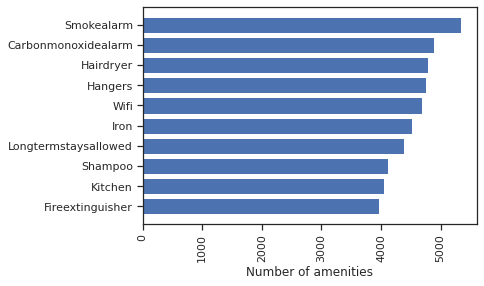

In [0]:
index = np.arange(10)
#plotting the number of amenities from the most to the least
fig, ax = plt.subplots(figsize=(6,4))
plt.barh(index,count_df.head(10)['num_amenities'])
plt.xticks(rotation = 'vertical')
plt.gca().invert_yaxis()
plt.xlabel("Number of amenities")
plt.yticks (index,count_df.head(10)['amenities_available'])
plt.show()

Compare impact of top amenities on target variables

In [0]:
#add columns of top three amenities features
ld_cat_many = ld[['amenities']]
ld_cat_many['wifi_available'] = ld_cat_many['amenities'].apply(lambda x: 1 if 'Wifi' in x else 0)
ld_cat_many['heating_available'] = ld_cat_many['amenities'].apply(lambda x: 1 if 'Heating' in x else 0)
ld_cat_many['essentials_available'] = ld_cat_many['amenities'].apply(lambda x: 1 if 'Essentials' in x else 0)
ld_amenities= pd.concat([ld_cat_many,ld[response],ld_cleaned], axis=1).drop('amenities',axis=1)
ld_amenities.head()

,wifi_available,heating_available,essentials_available,price,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,...,name_length,description_length,amenities_length,host_months,availability_30,availability_60,availability_90,availability_365,reviews_per_month,review_scores_rating
0,1,0,1,55.0,0,0,0,0,0,0,...,0.241379,1.0,0.148002,0.850575,0.233333,0.400000,0.600000,0.147945,0.023300,0.9200
1,1,1,1,194.0,0,0,0,0,0,0,...,0.275862,1.0,0.552541,1.000000,0.033333,0.250000,0.388889,0.441096,0.062226,0.9650
2,1,1,1,235.0,0,1,0,0,0,0,...,0.112069,1.0,0.101135,0.959770,1.000000,1.000000,1.000000,1.000000,0.018092,0.9700
3,1,1,0,56.0,0,0,0,0,0,0,...,0.387931,1.0,0.197829,0.936782,1.000000,1.000000,1.000000,1.000000,0.002193,0.9175
4,1,1,1,575.0,0,0,0,0,0,0,...,0.224138,1.0,0.266404,0.931034,0.966667,0.983333,0.988889,0.997260,0.004386,0.9675


                heating      wifi  essentials
availability                                 
Not_Available  0.952629  0.966381    0.939435
Available      0.937449  0.938030    0.941157


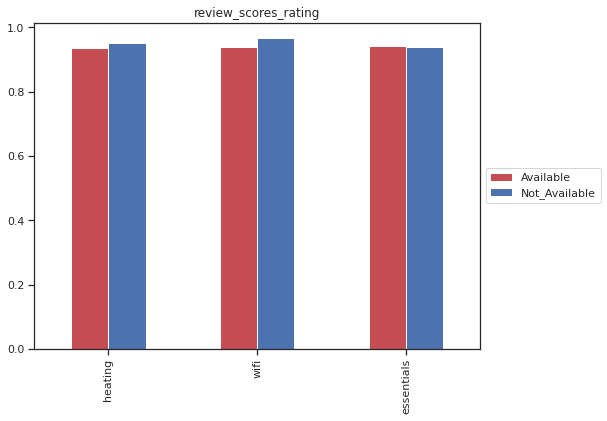

In [0]:
target = 'review_scores_rating'
comparison_amenities(target,ld_amenities)

                heating      wifi  essentials
availability                                 
Not_Available  0.050790  0.056675    0.034053
Available      0.033102  0.034972    0.037549


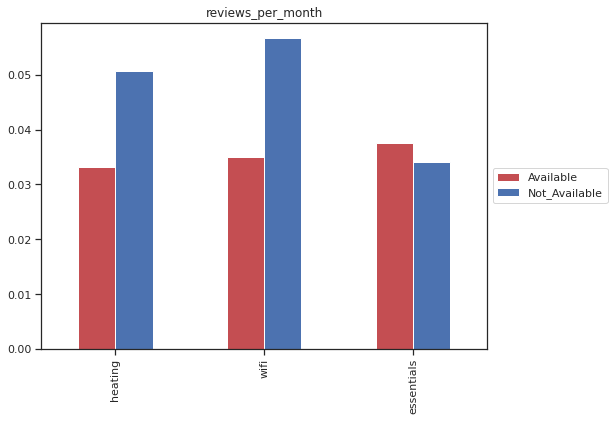

In [0]:
target = 'reviews_per_month'
comparison_amenities(target,ld_amenities)